In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

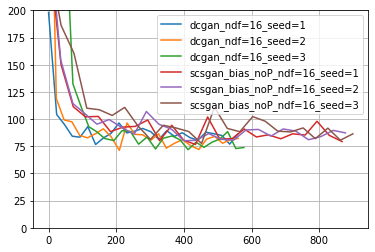

In [70]:
runs = [
    "./runs/new/dcgan_ndf=16_seed=1/",
    "./runs/new/dcgan_ndf=16_seed=2/",
    "./runs/new/dcgan_ndf=16_seed=3/",
    "./runs/new/scsgan_bias_noP_ndf=16_seed=1/",
    "./runs/new/scsgan_bias_noP_ndf=16_seed=2/",
    "./runs/new/scsgan_bias_noP_ndf=16_seed=3/",
]
for run_path in runs:
    run_path = Path(run_path)

    csv_table = pd.read_csv(run_path / "fid.txt", header=None)
    epochs, iterations, timestamps, fids = np.array(csv_table).T

    plt.plot(timestamps-timestamps[0], fids, label=run_path.stem)
plt.legend()
plt.grid()
plt.ylim(0, 200)
plt.show()

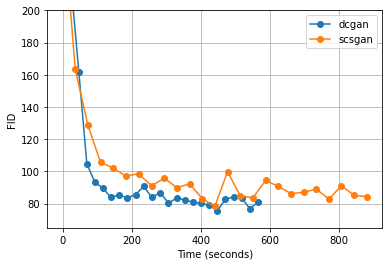

In [71]:
# Average across many runs, grouped
run_groups = {
    "dcgan": [
        "./runs/new/dcgan_ndf=16_seed=1/",
        "./runs/new/dcgan_ndf=16_seed=2/",
        "./runs/new/dcgan_ndf=16_seed=3/",
    ],
    "scsgan": [
        "./runs/new/scsgan_bias_noP_ndf=16_seed=1/",
        "./runs/new/scsgan_bias_noP_ndf=16_seed=2/",
        "./runs/new/scsgan_bias_noP_ndf=16_seed=3/",
    ]
}
for group_name, runs in run_groups.items():
    group_times = []
    group_fids = []
    for run_path in runs:
        run_path = Path(run_path)

        csv_table = pd.read_csv(run_path / "fid.txt", header=None)
        epochs, iterations, timestamps, fids = np.array(csv_table).T
        group_times.append(np.array(timestamps)-timestamps[0])
        group_fids.append(np.array(fids))

    group_fids = np.array(group_fids)
    group_fids = np.mean(group_fids, axis=0)
    group_times = np.array(group_times)
    group_times = np.mean(group_times, axis=0)
    plt.plot(group_times, group_fids, 'o-', label=group_name)
plt.grid()
plt.ylim(65, 200)
plt.ylabel("FID")
plt.xlabel("Time (seconds)")
plt.legend()
plt.savefig("media/FID_results.png")
plt.show()